# Bomb dive in machine learning source code

This jupyter notebook contains all the code presented as example in the blog article available at http://www.workloadautomation-community.com/blogs/bomb-dive-into-machine-learning-episode-1

In the article we imagined a sportswear company that is going to launch a new series of technical clothing that cover most of sports represented in the Olympic games. They want to overcome the competitors creating custom sizes and providing the best fit in the market for every sport.

We approached the problem with the linear regression, obtaining a model that predicts the height of an athlete given its weight, age, sport and gender.

We then applied this model to generate the best height associated to the different shirt sizes 

# Global variables and imports

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from dateutil.relativedelta import relativedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datasets import

the dataset can be downloaded from https://www.kaggle.com/rio2016/olympic-games

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%y')

def getAge(dob):
    if dob==np.datetime64('NaT'):
        dob=pd.to_datetime('now')
    r = relativedelta(pd.to_datetime('now'), dob)
    if (r.years<0):
        return 0
    return r.years

dataset=pd.read_csv('../dataset/athletes.csv', ',')
# drops rows with missing values
dataset=dataset.dropna()
dataset["dob"]=pd.to_datetime(dataset["dob"], format="%m/%d/%y")
dataset["age"]=dataset["dob"].apply(getAge)
dataset=dataset[dataset["age"]>0]
# print a preview of the first top 5 rows
dataset.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0,49
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0,32
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1,26
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0,28
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0,28


# Analyze the relation between height and weight  

<IPython.core.display.Javascript object>


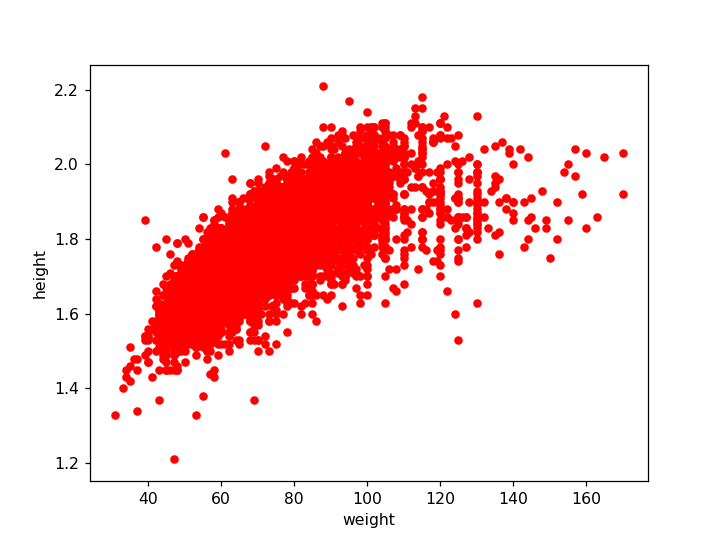

In [3]:
dataset.plot(kind='scatter',x='weight',y='height',color='red')
plt.show()

# Analyze the relation between height and age 

<IPython.core.display.Javascript object>


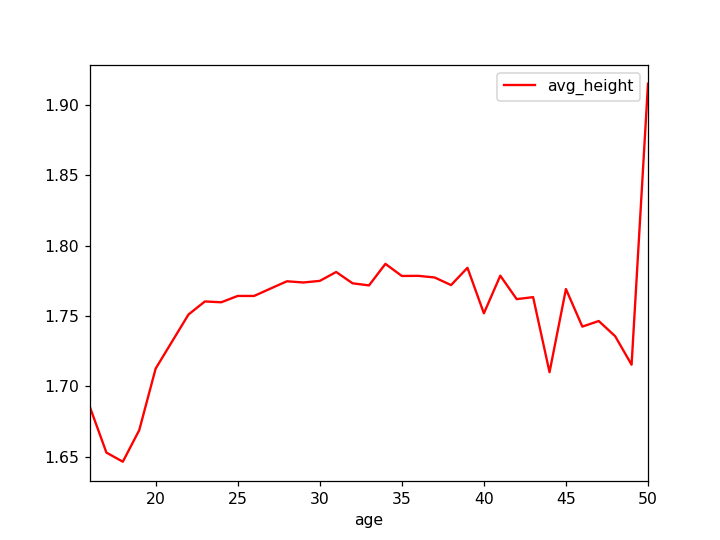

In [4]:
# get list of all the unique ages in the dataset
ages=dataset.age.unique()
# get the average height for every age 
avgHeight=dataset[['height','age']].groupby(['age']).mean()
# create a dataframe to relate ages and average heights
ageVsAverageHeight=pd.DataFrame({'age':avgHeight.index.values, 'avg_height': avgHeight['height']})
ageVsAverageHeight.plot(kind='line',x='age',y='avg_height',color='red')
plt.show()
#avgHeight.index.values

# Feature engineering and data preprocessing

In [5]:
def categorize_age(age):
    if (age<18):
        return "younger_18"
    elif (age<20):
        return "18_20"
    elif (age<22):
        return "20_22"
    elif (age<24):
        return "22_24"
    elif (age<26):
        return "24_26"
    elif (age<30):
        return "26_30"
    elif (age<34):
        return "30_34"
    elif (age<38):
        return "34_38"
    elif (age<42):
        return "38_42"
    elif (age<46):
        return "42_46"
    else:
        return "older_46"

dataset=dataset.drop(['id', 'name', 'dob', 'nationality'], axis=1)
dataset["age"]=dataset["age"].apply(categorize_age)
dataset=pd.get_dummies(dataset)
dataset.head()

,height,weight,gold,silver,bronze,sex_female,sex_male,sport_aquatics,sport_archery,sport_athletics,...,age_20_22,age_22_24,age_24_26,age_26_30,age_30_34,age_34_38,age_38_42,age_42_46,age_older_46,age_younger_18
0,1.72,64.0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1.68,56.0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.98,79.0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1.81,71.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Training and test set

In [6]:
train, test = train_test_split(dataset, test_size=0.2)
train.head()

,height,weight,gold,silver,bronze,sex_female,sex_male,sport_aquatics,sport_archery,sport_athletics,...,age_20_22,age_22_24,age_24_26,age_26_30,age_30_34,age_34_38,age_38_42,age_42_46,age_older_46,age_younger_18
3467,1.71,64.0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
592,1.88,77.0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5697,1.86,77.0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1995,1.80,72.0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5773,1.79,88.0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Linear Regression

In [7]:
X= train.drop('height', axis=1)
y=train["height"]

model=LinearRegression().fit(X, y)

In [8]:
model.score(X,y)

0.7326950350245564

# Performances on test set

In [9]:
Xt=test.drop("height",axis=1)
yt=test["height"]
model.score(Xt,yt)

0.7628868056309535

# Create athletes

In [10]:
class Athlete:
    
    def __init__(self, weight=75, sport="aquatics", age=25, gender="female", columns=[]):
        self.weight=weight
        self.sport=sport
        self.age=age
        self.gender=gender
        self.columns=columns
        self.generate(weight, sport, age, gender)
        
    def generate(self, weight, sport, age, gender):
        self.df=pd.Series([0] * (len(self.columns)), self.columns)
        self.df["sport_"+sport]=1.0
        self.df["age_"+categorize_age(age)]=1.0
        self.df["sex_"+gender]=1.0
        self.df["weight"]=weight

# Prediction height on judo athlete

In [11]:
judoka=Athlete(75, "judo", 25, columns=Xt.columns.values)
preds=model.predict([judoka.df]).tolist()
print(preds)

[1.6931695938110352]


# Prediction height on basketball player

In [12]:
basketPlayer=Athlete(75, "basketball", 25, columns=Xt.columns.values)
preds=model.predict([basketPlayer.df]).tolist()
print(preds)

[1.838789939880371]


# Function to plot a line chart of how the height evolves over the different weights 

In [13]:
def plotHeightAnalysis(sport, age, n_misures, delta_inc, gender="female"):
    weights=[]
    predHeights=[]
    weight_i=50

    for i in range(n_misures):
        player=Athlete(weight_i, sport, age, gender, columns=Xt.columns.values)
        predHeights.append(model.predict([player.df]).tolist()[0])
        weights.append(weight_i)
        weight_i=weight_i+1
    
    pd.DataFrame({'weight': weights, 'height': predHeights }).plot(kind='line',x='weight',y='height',color='red')
    plt.plot()

# Analysis judo athlete height change vs weight change

<IPython.core.display.Javascript object>


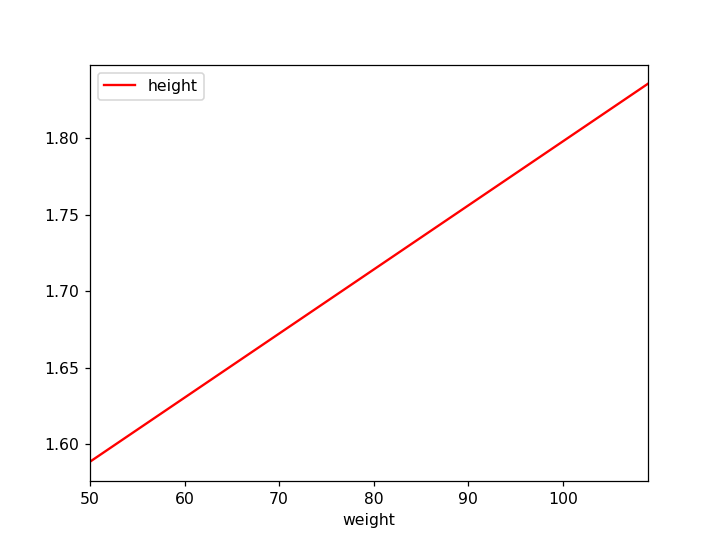

In [14]:
plotHeightAnalysis("judo",25,60,1)

# Analysis judo athlete height change vs weight change

<IPython.core.display.Javascript object>


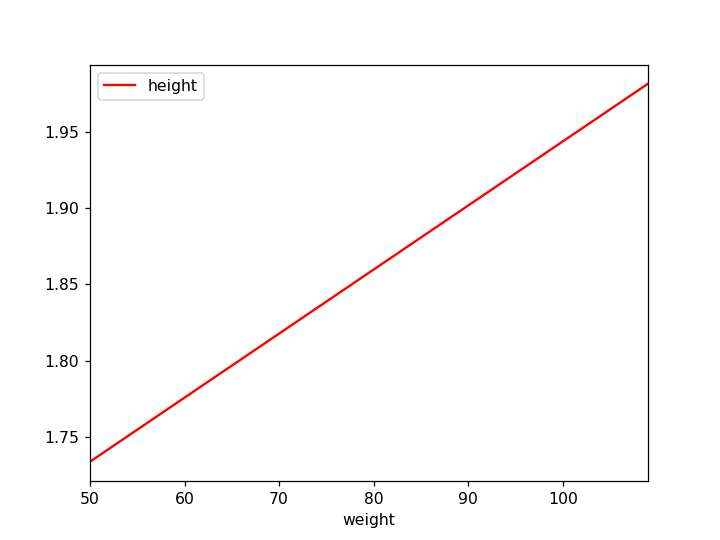

In [15]:
plotHeightAnalysis("basketball",25,60,1)

# Shirt size calculator

In [31]:
def getSizesHeight(sport, age, gender, weight_range):
    sizesHeight={}
    sizes=["xs", "s", "m", "l" , "xl", "xxl"]
    # calculate the increment of weight between every size
    weight_inc=(weight_range[1]-weight_range[0])/len(sizes)
    # inizialize the weight 
    weight=weight_range[0]
    for size in sizes:
        athlete=Athlete(weight, sport, age, gender, columns=Xt.columns.values)
        sizesHeight[size]=model.predict([athlete.df]).tolist()[0]
        weight=weight+weight_inc
    return sizesHeight
    

In [32]:
getSizesHeight("judo", 30, "male", [50, 120])

{'l': 1.7838115692138672,
 'm': 1.733515739440918,
 's': 1.6832189559936523,
 'xl': 1.8299169540405273,
 'xs': 1.6371145248413086,
 'xxl': 1.8802127838134766}

In [33]:
getSizesHeight("judo", 30, "female", [50, 120])

{'l': 1.731123924255371,
 'm': 1.6808280944824219,
 's': 1.6305313110351562,
 'xl': 1.7772293090820312,
 'xs': 1.5844268798828125,
 'xxl': 1.8275251388549805}

In [34]:
getSizesHeight("basketball", 30, "female", [50, 120])

{'l': 1.876744270324707,
 'm': 1.8264484405517578,
 's': 1.7761516571044922,
 'xl': 1.9228496551513672,
 'xs': 1.7300472259521484,
 'xxl': 1.9731454849243164}

In [35]:
getSizesHeight("basketball", 30, "male", [50, 120])

{'l': 1.9294319152832031,
 'm': 1.879136085510254,
 's': 1.8288393020629883,
 'xl': 1.9755373001098633,
 'xs': 1.7827348709106445,
 'xxl': 2.0258331298828125}